## The Sparks Foundation

## Name: Yash Niraj Majmudar

## Task : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False, encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data Cleaning

In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','city':'City','region_txt':'Region','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
                   'latitude':'Latitude','longitude':'Longitude'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
df.dropna()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [9]:
df = df[['Year','Month','Day','Country','City','State','Region','City','Latitude','AttackType','Killed',
        'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Day,Country,City,State,Region,City,Latitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Santo Domingo,NaN,Central America & Caribbean,Santo Domingo,18.456792,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Mexico city,Federal,North America,Mexico city,19.371887,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Unknown,Tarlac,Southeast Asia,Unknown,15.478598,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Athens,Attica,Western Europe,Athens,37.997490,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Fukouka,33.580412,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Data Analysis

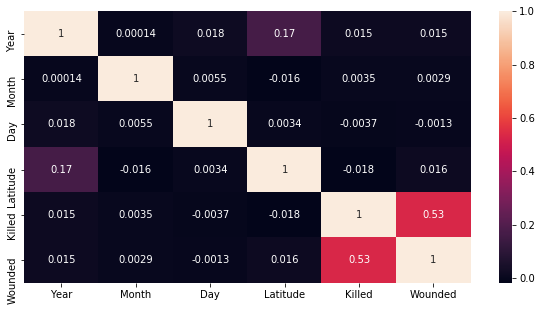

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

## Country Wise Analysis

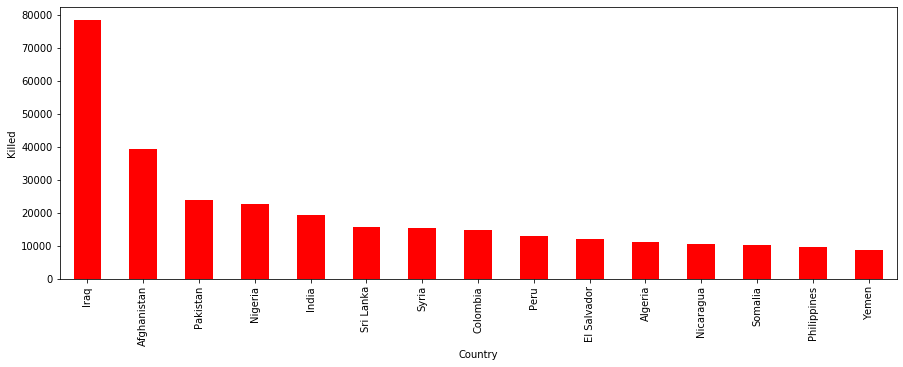

In [11]:
plt.figure(figsize = (15,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'red')
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

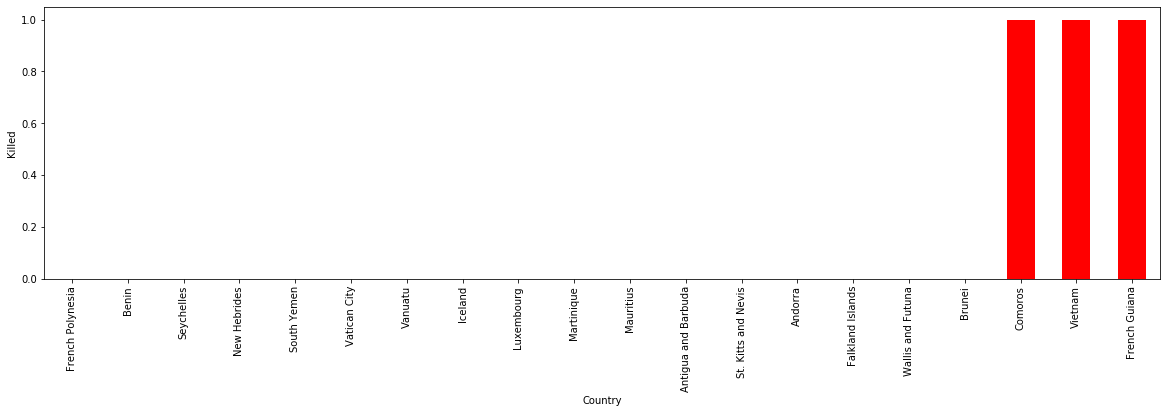

In [12]:
plt.figure(figsize = (20,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = True).head(20).plot(kind = 'bar', color = 'red')
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

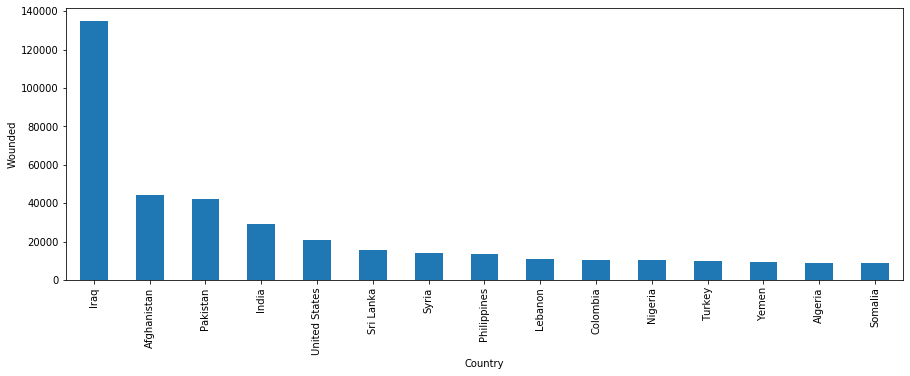

In [13]:
plt.figure(figsize = (15,5))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar')  ##

plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.show()

In [14]:
print('Country with most attacks:', df['Country'].value_counts().idxmax())

Country with most attacks: Iraq


## Region Wise Analysis

In [15]:
print('Region with most attacks:', df['Region'].value_counts().idxmax())

Region with most attacks: Middle East & North Africa


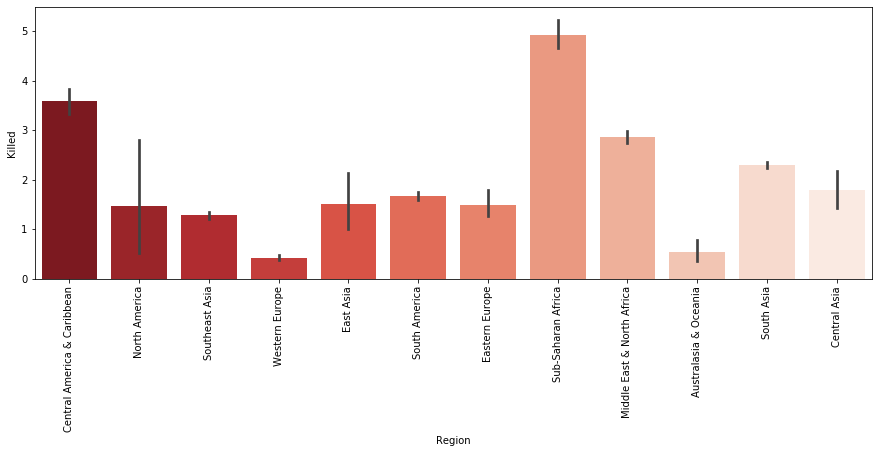

In [16]:
plt.figure(figsize = (15,5))
sns.barplot(x='Region',y='Killed',data=df, palette="Reds_r")
plt.xticks(rotation=90)
plt.ylabel('Killed')
plt.show()

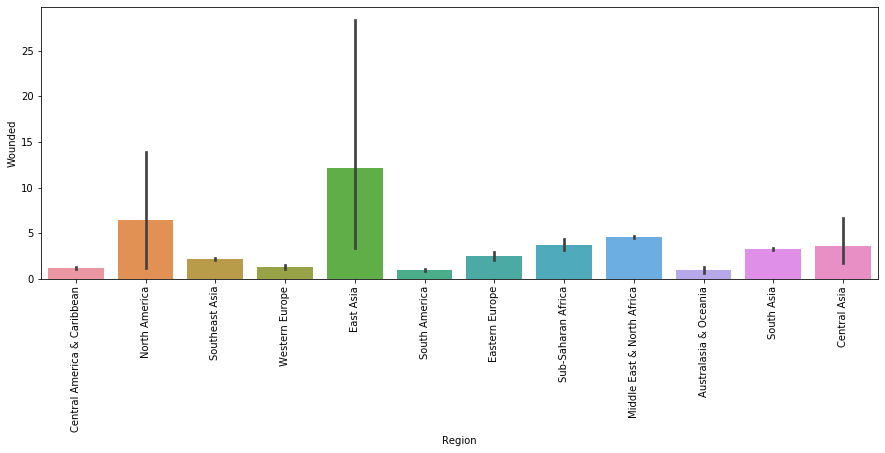

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region',y='Wounded',data=df)
plt.xticks(rotation=90)
plt.ylabel('Wounded')
plt.show()

## Yearly Analysis

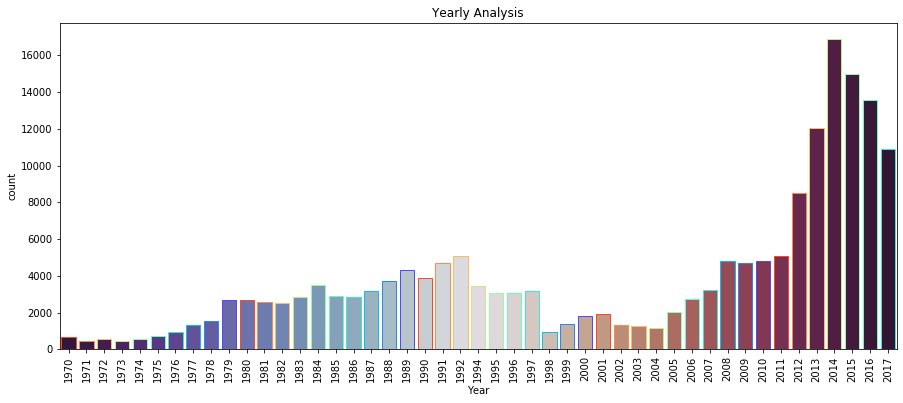

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=df,palette='twilight_shifted',edgecolor=sns.color_palette('rainbow_r',10))
plt.xticks(rotation=90)                                                                        ##
plt.title('Yearly Analysis')
plt.show()

## Number and Types Of Attacks

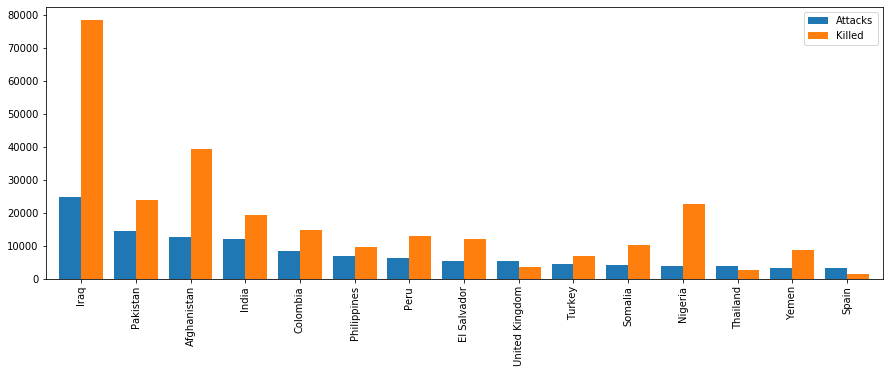

In [19]:
country_count=df['Country'].value_counts()[:15].to_frame()
country_count.columns=['Attacks']
kills=df.groupby('Country')['Killed'].sum().to_frame()
country_count.merge(kills,left_index=True,right_index=True,how='left').plot.bar(width=.8)
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

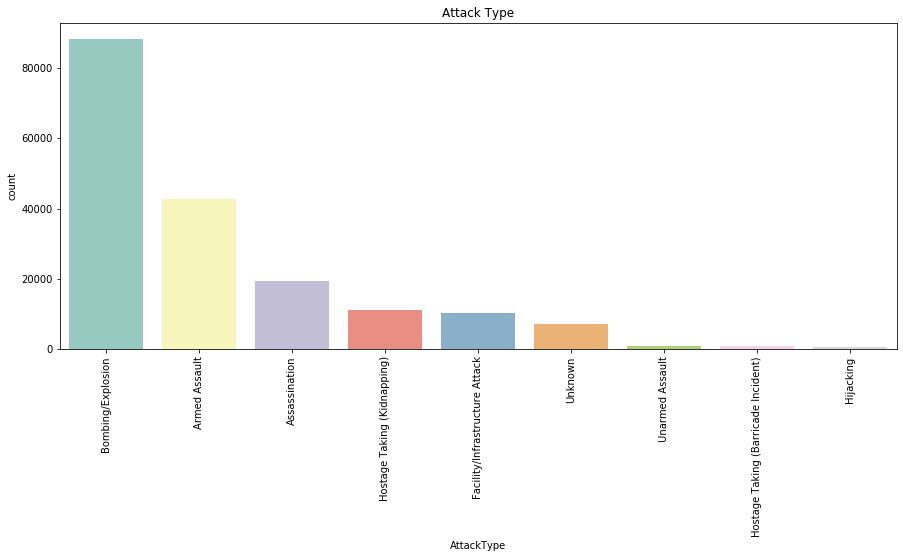

In [20]:
plt.subplots(figsize = (15,6))
sns.countplot('AttackType',data=df,palette='Set3',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attack Type')
plt.show()

## Top Terrorist Groups

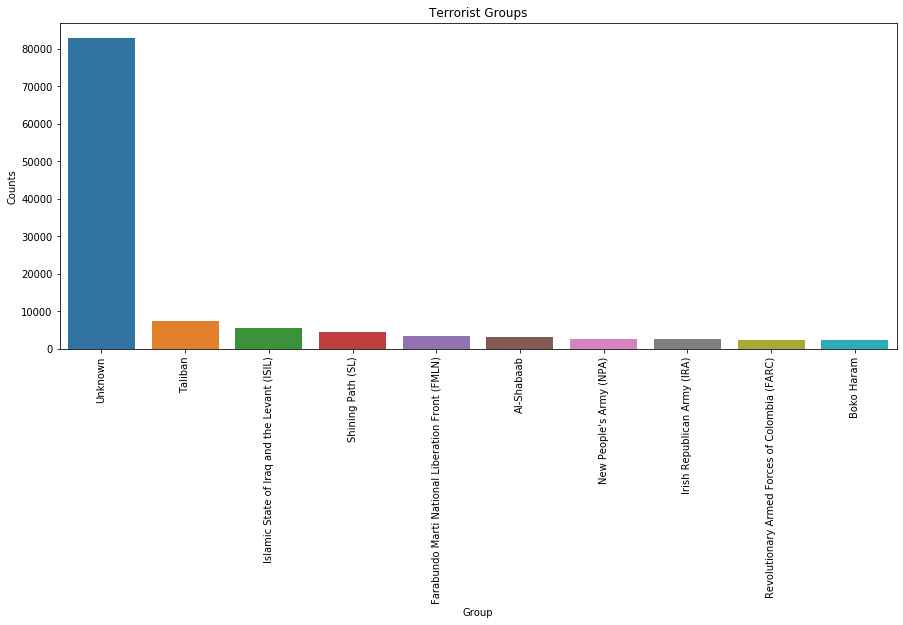

In [21]:
fig = plt.figure(figsize=(15,6))
sns.barplot(df['Group'].value_counts()[:10].index,df['Group'].value_counts()[:10].values)
plt.title('Terrorist Groups')
plt.xlabel('Group')
plt.ylabel('Counts')
#Rotate the labels on X-axis so that they don't overlap
plt.xticks(rotation=90);

# Conclusion:
## Country wise-
### -Iraq is by far the most affected country in the world by terrorism, followed by Afghanistan and Pakistan.
### -Berlin, Yemen and Mauritius are amongst the least prone to terrorist attacks.

## Region wise-
### -Middle East and North Africa is the most affected region due to terrorism in the world.
### -While Western Europe and Australasia and Oceania are the least prone.

## Year wise-
### -Terrorist activities has increased drastically since 2011, reaching it's peak in 2014.

## Attacks-
### -Number of terrorist attacks on a country is highest in Iraq followed by Pakistan and Afghanistan.
### -Bombing is most frequently used attack type by terrorist, followed by Armed Assault and Assasination.

## Terrorist Groups-
### -Most of the attacks are carried out by unknown groups.
### -The known group which is responsible for highest number of attacks is Taliban.

# Solution
### -Since Iraq is the most affected country by terror, security in the country should be increased. 
### -Production of explosive material should be restricted to only trusted authority.